In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [14]:
df.shape

(50000, 2)

In [15]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [17]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


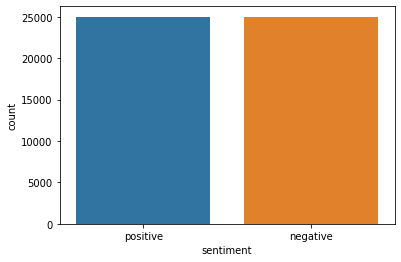

In [18]:
sns.countplot(df['sentiment'])

In [19]:
df.dtypes

review       object
sentiment    object
dtype: object

In [20]:
x = df["review"]
y = df["sentiment"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.75)

In [23]:
x_train

6765     I bought Jack-O a number of months ago at a Bl...
44825    Man, this movies sucked. It appeared to have l...
30610    Oh my, where to start... this movie was just a...
27284    As embarrassing as it is to admit, I was liste...
23563    It is a nice comedy. It has the great features...
                               ...                        
25224    "For a Squadron Leader - normally the only guy...
32463    Larisa Shepitko's THE ASCENT (1976) is an extr...
33150    Sure, the film is full of black militant stere...
1008     "I like cheap perfume better; it doesn't last ...
45743    Terrible film with Frank Sinatra as Tony Rome....
Name: review, Length: 12500, dtype: object

In [24]:
x_test

962      I laughed so hard during this movie my face hu...
44362    My 3rd-year French classes always enjoyed this...
23351    Me and my mates used to gather together in one...
46025    Don't hate Heather Graham because she's beauti...
45165    The sequel to the ever popular Cinderella stor...
                               ...                        
14081    I wouldn't go so far as to not recommend this ...
41590    I watched this last night on Sundance. Altman ...
25370    Larry Fessenden has been thrashed by most of t...
10456    What has Rajiv Rai done to himself? Once a hit...
108      Despite later claims, this early-talkie melodr...
Name: review, Length: 37500, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [26]:
x_train_vect = vect.fit_transform(x_train)
x_train_vect

<12500x57386 sparse matrix of type '<class 'numpy.int64'>'
	with 1697871 stored elements in Compressed Sparse Row format>

In [27]:
x_test_vect = vect.transform(x_test)
x_test_vect

<37500x57386 sparse matrix of type '<class 'numpy.int64'>'
	with 5056097 stored elements in Compressed Sparse Row format>

SVC

In [28]:
from sklearn.svm import SVC

In [29]:
model1 = SVC()

In [30]:
model1.fit(x_train_vect,y_train)

SVC()

In [31]:
y_pred1 = model1.predict(x_test_vect)
y_pred1

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [33]:
accuracy_score(y_test,y_pred1)

0.84656

In [35]:
confusion_matrix(y_test,y_pred1)

array([[15476,  3315],
       [ 2439, 16270]])

SVC with PIPELINE

In [36]:
from sklearn.pipeline import make_pipeline

In [37]:
model2 = make_pipeline(CountVectorizer(),SVC())

In [38]:
model2.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [39]:
y_pred2 = model2.predict(x_test)
y_pred2

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [40]:
accuracy_score(y_test,y_pred2)

0.84656

In [42]:
confusion_matrix(y_test,y_pred2)

array([[15476,  3315],
       [ 2439, 16270]])

Multinomial Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
model3 = MultinomialNB()

In [45]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [46]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype='<U8')

In [47]:
accuracy_score(y_test,y_pred3)

0.8377866666666667

In [48]:
confusion_matrix(y_test,y_pred3)

array([[16413,  2378],
       [ 3705, 15004]])

MultinomialNB with Pipeline


In [49]:
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

In [50]:
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [51]:
y_pred4 = model4.predict(x_test)
y_pred4

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype='<U8')

In [52]:
accuracy_score(y_test,y_pred4)

0.8377866666666667

In [54]:
confusion_matrix(y_test,y_pred4)

array([[16413,  2378],
       [ 3705, 15004]])

Joblib

In [55]:
import joblib

In [56]:
joblib.dump(model2,"IMDB_Review_Analysis")

['IMDB_Review_Analysis']

Streamlit Deployment

In [57]:
!pip install -q streamlit

     |████████████████████████████████| 9.1 MB 4.3 MB/s 
     |████████████████████████████████| 164 kB 47.9 MB/s 
     |████████████████████████████████| 181 kB 48.3 MB/s 
     |████████████████████████████████| 4.7 MB 38.0 MB/s 
     |████████████████████████████████| 235 kB 54.4 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 7.3 MB/s 


In [64]:
%%writefile imdb_review.py
import streamlit as st
import joblib

reloaded_model = joblib.load("IMDB_Review_Analysis")

st.title("    IMDB MOVIE REVIEW       ")
st.header("Model used for analysis is ")
st.write(reloaded_model)

review = st.text_input("Write your review :  ")

if not review:
  st.warning("Please give a review")
  st.stop()
st.success("Thank you giving a review")

output = reloaded_model.predict(review)

if st.button("Analyse"):
  print(output[0])

Overwriting imdb_review.py


In [ ]:
#Run the streamlit webapp
!streamlit run imdb_review.py & npx localtunnel --port 8501

2022-09-12 17:59:28.564 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.683s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.234.54.14:8501

your url is: https://smooth-emus-teach-35-234-54-14.loca.lt
2022-09-12 18:00:52.789 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 556, in _run_script
    exec(code, module.__dict__)
  File "/content/imdb_review.py", line 17, in <module>
    output = reloaded_model.predict(review)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 469, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/feature